# Neural Network Classification with PyTorch

*Classification* is the problem of predicting wheher something is one thing or another (there can be multiple thinga as the option).

In [1]:
import sklearn
import torch
import pandas as pd
import matplotlib.pyplot as plt

## 1. Make Classification Data and Get it Ready

In [2]:
from sklearn.datasets import make_circles

# Creating 1000 samples
n_samples = 1000

# Generate circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

print(f"First five samples of X:\n{X[:5]}")
print(f"First five labels of y:\n{y[:5]}")

First five samples of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five labels of y:
[1 1 1 1 0]


In [3]:
# Making DataFrames
circles = pd.DataFrame({"feature_1": X[:, 0], "feature_2": X[:, 1], "label": y})
circles.head()

,feature_1,feature_2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


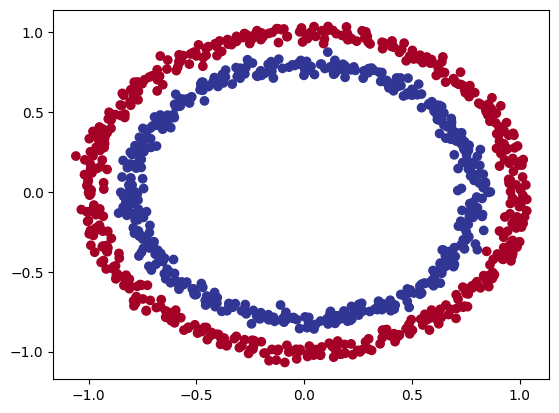

In [23]:
# Visualizing the data
def plot_circles(circles=circles):
    plt.scatter(x=circles.feature_1, y=circles.feature_2, c=circles.label, cmap=plt.cm.RdYlBu,)
    plt.show()
plot_circles()

In [5]:
# Turning data into tensors
X = torch.tensor(X).type(torch.float)
y = torch.tensor(y).type(torch.float)

In [8]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:

1. **Setup device agnostic code** so our code will run on an accelerator (GPU) if there is one  
2. **Construct a model** (by subclassing `nn.Module`)  
3. **Define a loss function and optimizer**  
4. **Create a training and test loop**


In [9]:
# Device Agnostic Code
def get_device():
    if torch.cuda.is_available():
        return torch.device("cuda")      # NVIDIA GPU (Windows/Linux)
    elif torch.backends.mps.is_available():
        return torch.device("mps")       # Apple Silicon GPU (Mac M1/M2/M3)
    else:
        return torch.device("cpu")       # CPU fallback

device = get_device()
print("Using device:", device)

Using device: mps


Now we've setup device agnostic code, let's create a model that:

1. **Subclasses `nn.Module`** (almost all models in PyTorch subclass `nn.Module`)
2. **Creates two `nn.Linear()` layers** that are capable of handling the shapes of our data
3. **Defines a `forward()` method** that outlines the forward pass (or forward computation) of the model
4. **Instantiates an instance of our model class** and sends it to the target `device`


In [10]:
# 1. Construct a model (by subclassing nn.Module)
class CircleModelV0(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # 2. Create 2 layers
        self.layer_1 = torch.nn.Linear(in_features=2, out_features=5) 
        self.layer_2 = torch.nn.Linear(in_features=5, out_features=1)
    
    def forward(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        return x

# 3. Instantiate the model and send it to the target device
model_0 = CircleModelV0().to(device)
print(model_0)

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


In [11]:
model_0.state_dict()  # model parameters

OrderedDict([('layer_1.weight',
              tensor([[0.4157, 0.2155],
                      [0.1414, 0.0387],
                      [0.6061, 0.4033],
                      [0.4030, 0.5309],
                      [0.6960, 0.4450]], device='mps:0')),
             ('layer_1.bias',
              tensor([ 0.2325,  0.5804,  0.2931,  0.4898, -0.0924], device='mps:0')),
             ('layer_2.weight',
              tensor([[ 0.3524,  0.2840, -0.1090, -0.1393, -0.4265]], device='mps:0')),
             ('layer_2.bias', tensor([0.2407], device='mps:0'))])

In [12]:
# Make a prediction
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(untrained_preds[:5])

tensor([[0.3632],
        [0.2113],
        [0.6595],
        [0.2797],
        [0.4974]], device='mps:0')


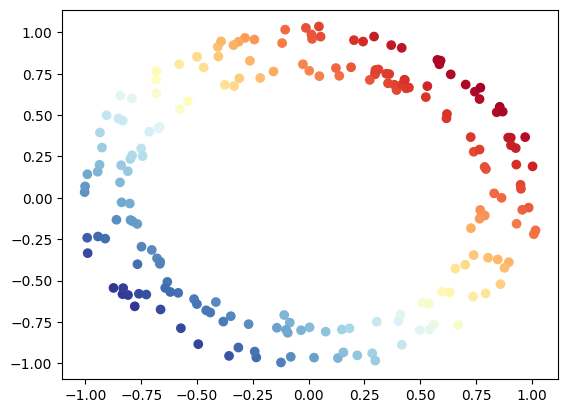

In [24]:
# Plot the model predictions
def plot_predictions(predictions):
    plt.scatter(x=X_test[:, 0].cpu(), y=X_test[:, 1].cpu(), c=predictions.cpu().squeeze(), cmap=plt.cm.RdYlBu)
    plt.show()

plot_predictions(untrained_preds)